# Übung: Zeckenstich Simulation mit Loop


Nun geht es weiter mit unserer Zeckenstich Monte-Carlo Simulation. Schritte 1 und 2 haben wir bereits erleidgt. Nun packen wir Schritt 3 an:

- Schritt 1: Einen Einzelpunkt zufällig verschieben ✓
- Schritt 2: Alle Punkte einer DataFrame zufällig verschieben (1 "Run") ✓
- **Schritt 3: Alle Punkte einer DataFrame mehrfach zufällig verschieben (z.B. 50 "Runs")**
- Schritt 4: Anteil der Punkte im Wald pro "Run" ermitteln

Ladet dafür die nötigen Module (`pandas` und `random`), holt euch die Funktion `offset_point()` und importiert den Datensatz `zeckenstiche.csv`. Tipp: Importiert mit `head(5)` nur die ersten 5 Zeile aus dem csv, das macht die die Entwicklung des Loops leichter.


In [ ]:
%matplotlib inline

In [75]:
import pandas as pd
import random

def offset_coordinate(old, distance = 100):
    new = old + random.normalvariate(0,distance)
    return(new)

zeckenstiche = pd.read_csv("zeckenstiche.csv")


```{figure} montepython.jpg
Quelle [twitter.com](https://twitter.com/GregoryRHancock/status/1179734188716707846?s=20)
```

## Übung 1: Mit For-Loop `zeckenstiche` mehrfach verschieben


Um euer Gedächnis etwas aufzufrischen: Letzte Woche hatten wir mit `apply()` sowie unserer eigenen *Function* `offset_coordinate` alle Koordinaten einer *DataFrame* verschoben und die neuen Daten als eine neue DataFrame abgespeichert.

In [76]:
zeckenstiche_sim = pd.DataFrame()

zeckenstiche_sim["ID"] = zeckenstiche["ID"]

zeckenstiche_sim["x"] = zeckenstiche["x"].apply(offset_coordinate)
zeckenstiche_sim["y"] = zeckenstiche["y"].apply(offset_coordinate)
zeckenstiche_sim

,ID,x,y
0,2550,2.681066e+06,1.250765e+06
1,10437,2.681299e+06,1.250817e+06
2,9174,2.681083e+06,1.250567e+06
3,8773,2.681108e+06,1.250735e+06
4,2764,2.681258e+06,1.250777e+06


Kombiniere dies nun mit deinem Wissen über Loops, um die Punkte der *DataFrame* nicht einmal, sondern 5 mal zu verschieben. Dazu brauchst du vor dem Loop eine leere Liste (z.B. `monte_carlo = []`) damit du den Output aus jedem Loop mit `append()`  abspeichern kannst. Erstelle auch eine neue Spalte `Run_Nr` mit der Nummer der Durchführung (die du vom Platzhalter erhältst).

In [77]:
# Musterlösung

monte_carlo = []
for i in range(5):
    zeckenstiche_sim = pd.DataFrame()

    zeckenstiche_sim["ID"] = zeckenstiche["ID"]

    zeckenstiche_sim["x"] = zeckenstiche["x"].apply(offset_coordinate)
    zeckenstiche_sim["y"] = zeckenstiche["y"].apply(offset_coordinate)
    zeckenstiche_sim["Run_Nr"] = i
    monte_carlo.append(zeckenstiche_sim)
    


## Übung 2: DataFrames aus Simulation zusammenführen

Schau dir die Outputs an. 

- Mit `type()`: 
  - Was für ein Datentyp ist `zeckenstiche_sim`?
  - Was für ein Datentyp ist `monte_carlo`?
- Mit `len()`: 
  - Wie vielen Elemente hat `zeckenstiche_sim`?
  - Wie viele Elemente hat `monte_carlo`? 


In [78]:
type(zeckenstiche)

pandas.core.frame.DataFrame

In [79]:
type(monte_carlo)

list

In [80]:
len(zeckenstiche)

5

In [81]:
len(monte_carlo)

5

Worauf ich hinaus will: `zeckenstiche_sim` ist eine *DataFrame* und `monte_carlo` ist eine Liste von *DataFrames*. Glücklicherweise kann man eine Liste von ähnlichen GeoDataFrames (ähnlich im Sinne von: gleiche Spaltennamen und -typen) mit der Funktion `concat()` aus `pandas` zu einer einzigen *DataFrame* zusammenführen. Führe die Funktion aus und speichere den Output als `monte_carlo_df`. 

In [82]:
monte_carlo_df = pd.concat(monte_carlo)

## Übung 3: Simulierte Daten visualisieren

Exploriere nun `monte_carlo_df`. Was ist es für ein Datentyp? Was hat es für Spalten? Visualisiere den Datensatz räumlich mit `monte_carlo_df.plot.scatter()`. 

In [83]:
# Musterlösung
monte_carlo_df.head()

,ID,x,y,Run_Nr
0,2550,2.681051e+06,1.250519e+06,0
1,10437,2.681220e+06,1.250724e+06,0
2,9174,2.681146e+06,1.250806e+06,0
3,8773,2.681187e+06,1.250594e+06,0
4,2764,2.680966e+06,1.250585e+06,0


<AxesSubplot:xlabel='x', ylabel='y'>

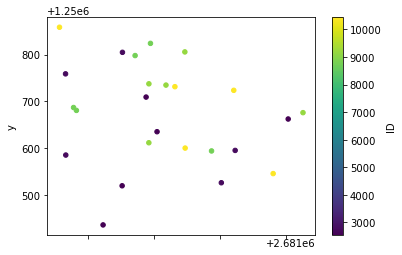

In [84]:
# Musterlösung
monte_carlo_df.plot.scatter("x","y", c = "ID", colormap = "viridis")
